https://www.kaggle.com/code/berkayalan/unsupervised-learning-clustering-complete-guide/notebook[link text](https://)


##k_means_model

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy



In [ ]:
df = pd.read_csv("/content/bank_marketing_dataset.csv")

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


First, let's try to undertand age distribution of customers.

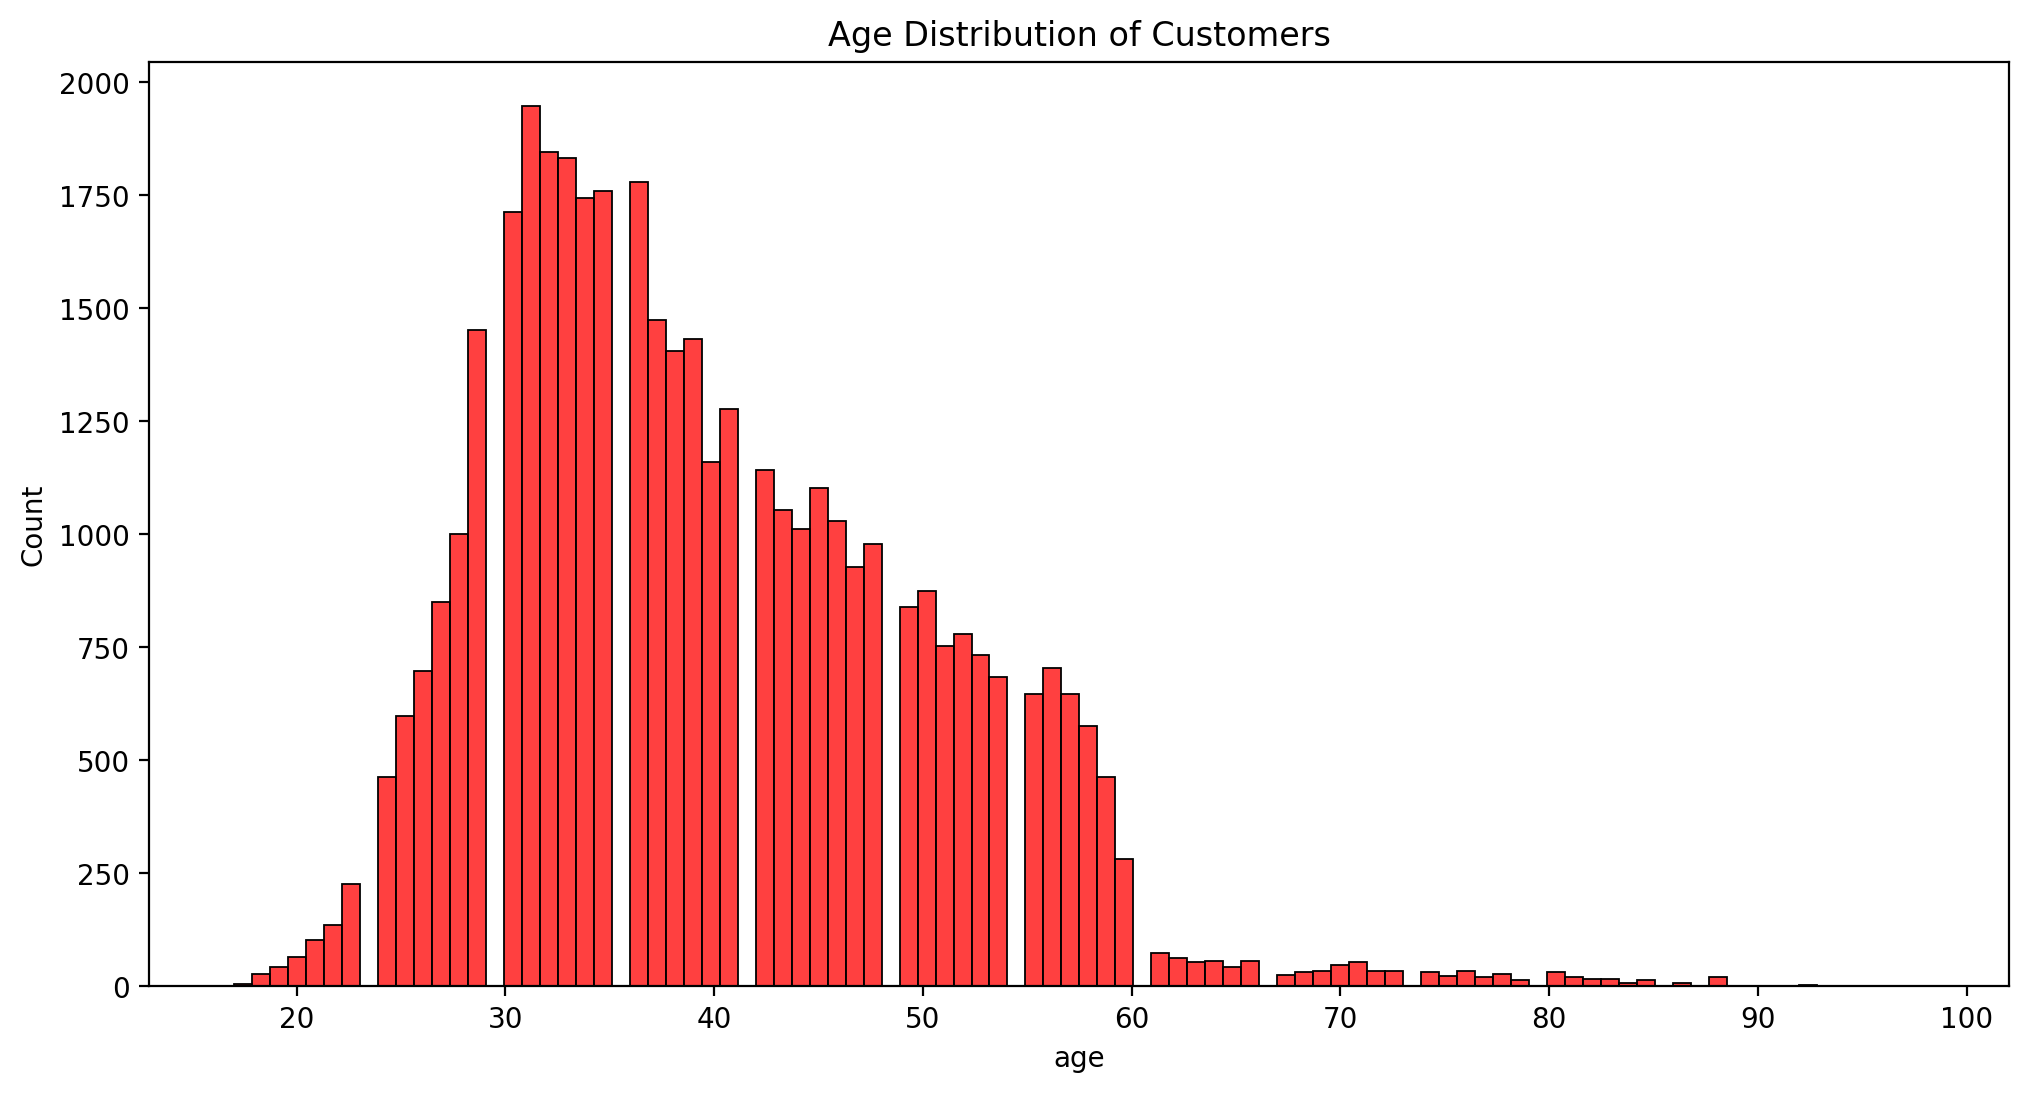

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="age",color="red")
plt.title("Age Distribution of Customers")
plt.show()

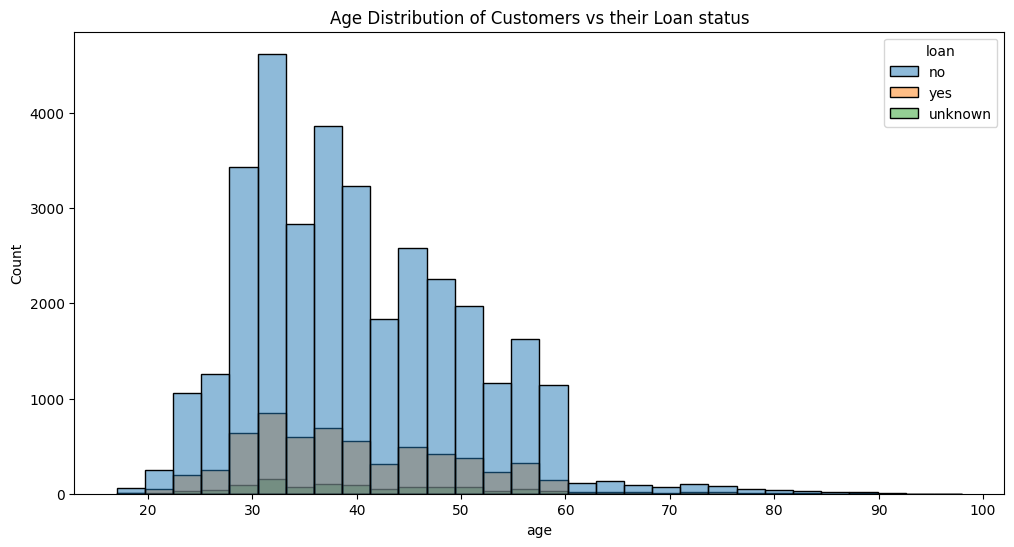

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=df,x="age",hue="loan",bins=30)
plt.title("Age Distribution of Customers vs their Loan status")
plt.show()

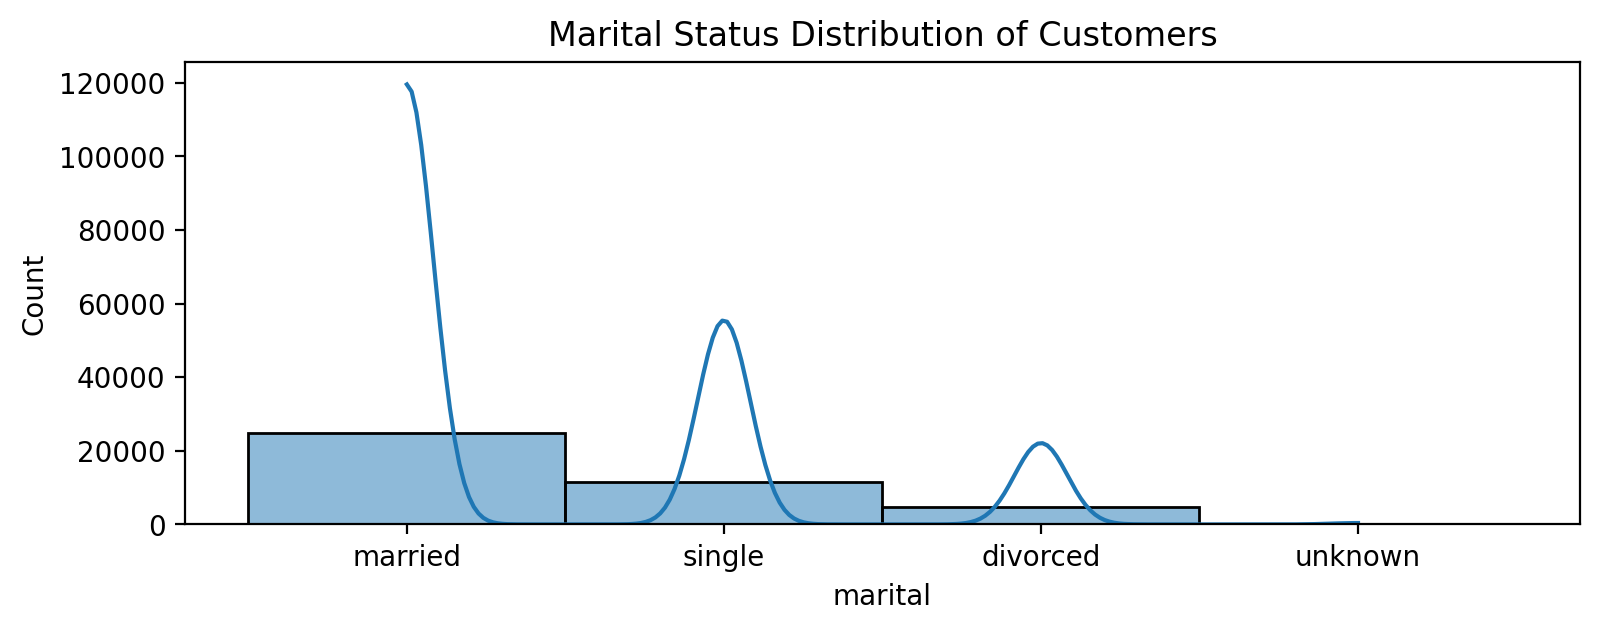

In [ ]:
plt.figure(figsize=(9,3),dpi=200)
sns.histplot(data=df,x="marital",kde=True)
plt.title("Marital Status Distribution of Customers")
plt.show()

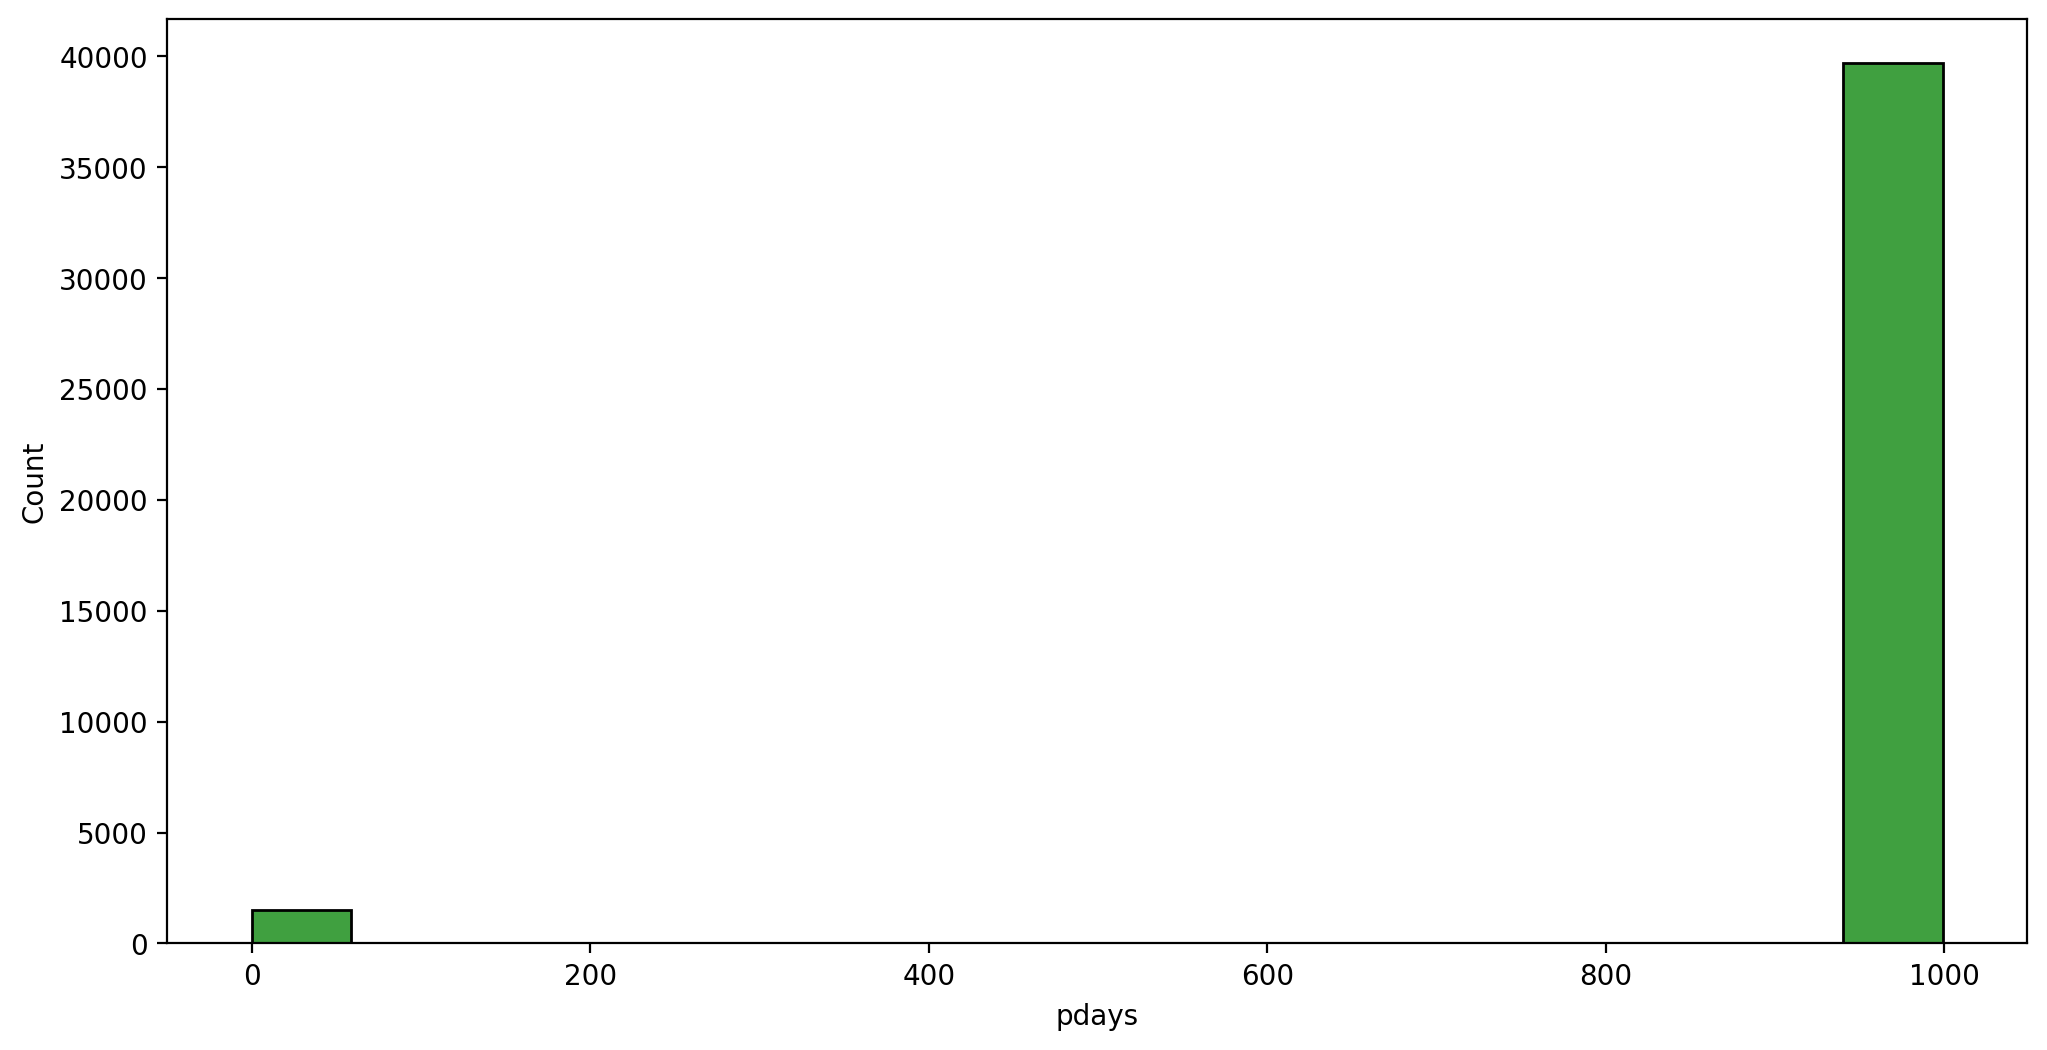

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="pdays",color="green")
plt.show()

In [ ]:
pd.DataFrame(df.pdays.value_counts()).head()


,count
pdays,
999,39673
3,439
6,412
4,118
9,64


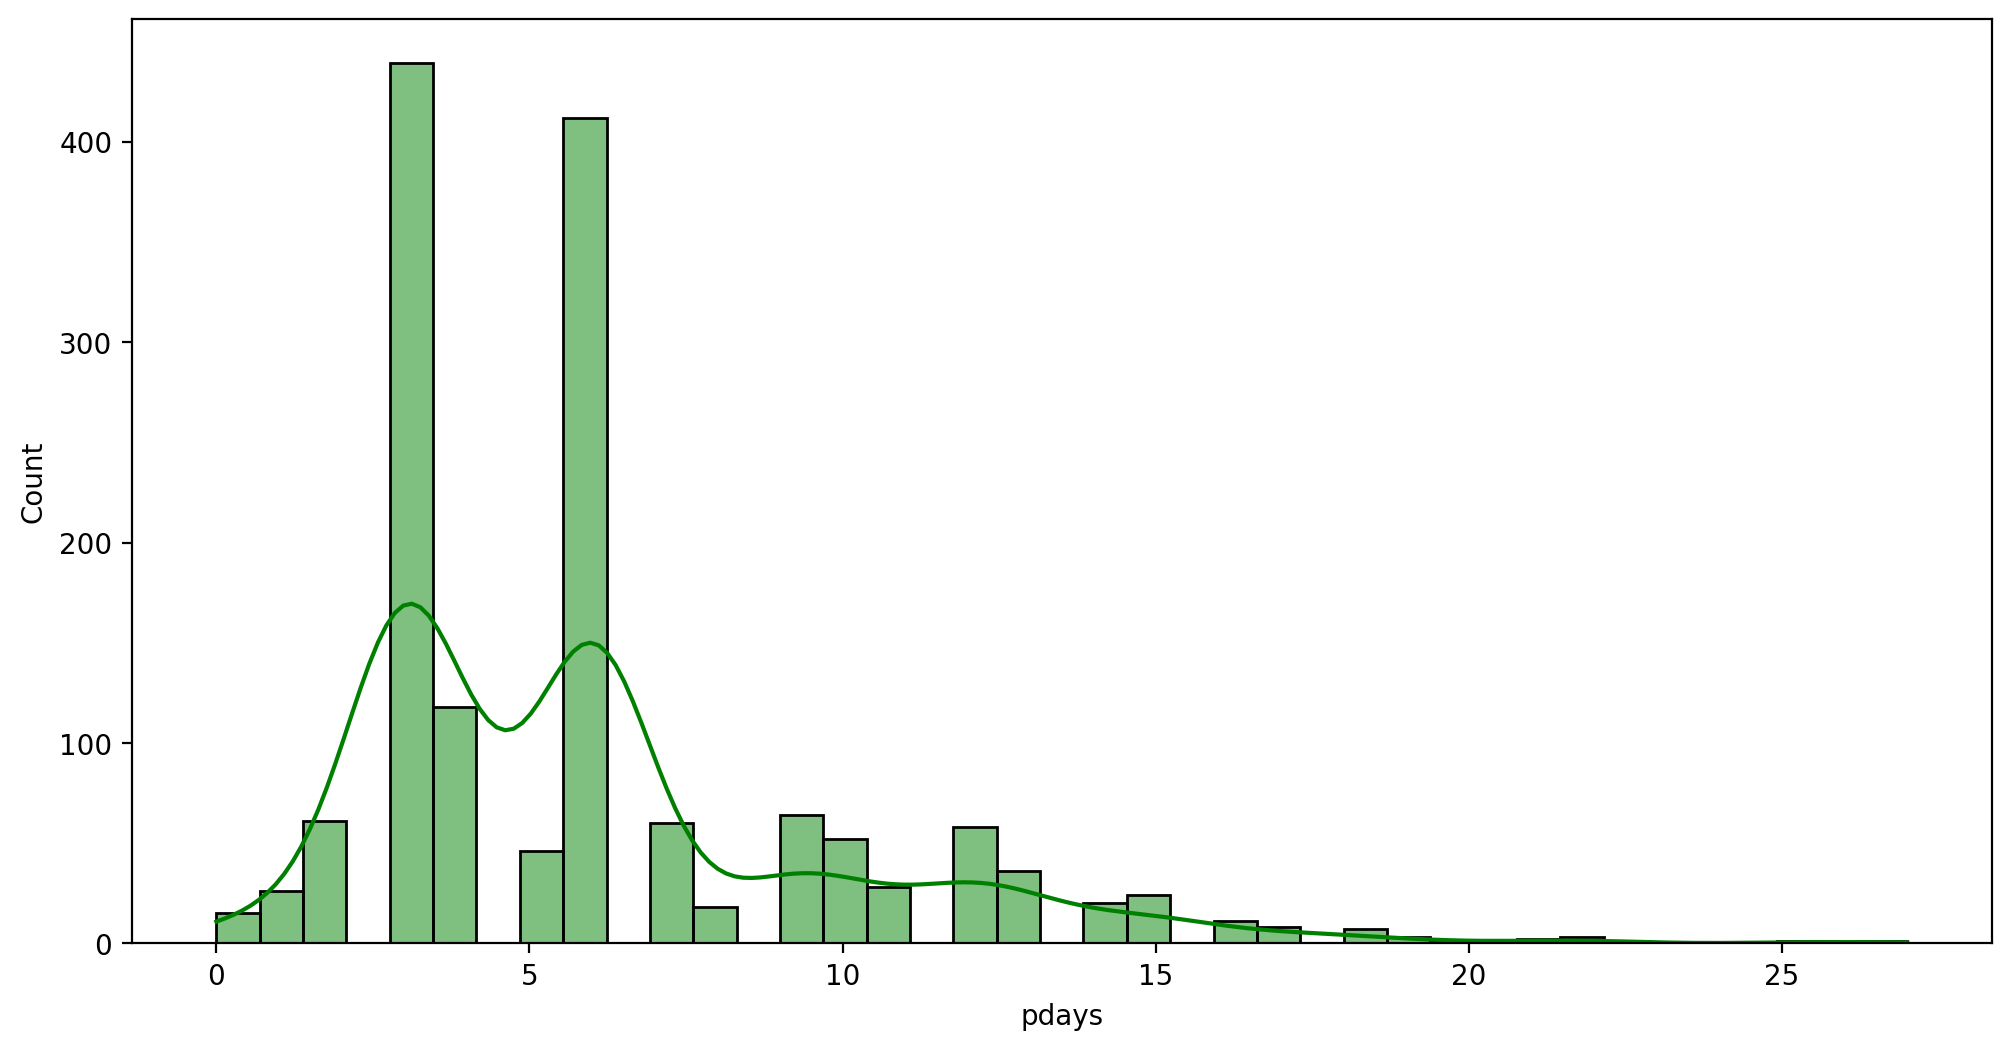

In [ ]:

plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df.pdays!=999],x="pdays",color="green",kde=True)
plt.show()

Now we will look loan status of customers.



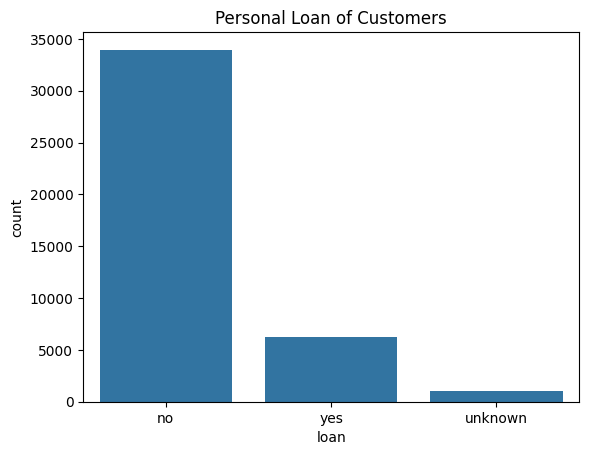

In [ ]:
sns.countplot(data=df,x="loan")
plt.title("Personal Loan of Customers")
plt.show()


In order to calculate distances for K-Means cluestering, all features must be in numeric format. To solve this issue, we will apply dummy method.

In [ ]:
df.shape


(41188, 21)

In [ ]:
df_dummies = pd.get_dummies(df)


In [ ]:
df_dummies.shape


(41188, 65)

In [ ]:
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True


In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df_dummies)


In [ ]:
df_scaled[0]


array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

In [ ]:
k_means_model = KMeans(n_clusters=2) #n_clusters is K value.


In [ ]:
k_means_model.fit(df_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
cluster_labels = k_means_model.predict(df_scaled) #we can also do that with fit_predict() method.


In [ ]:
cluster_labels


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_dummies["Cluster"] = cluster_labels


In [ ]:
df_dummies.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1


In [ ]:
df_dummies["Cluster"].unique()

array([1, 0], dtype=int32)

##Hierarchical Clustering Algorithm



In [26]:
df = pd.read_csv("/content/auto-mpg.csv")



In [27]:
df.shape

(398, 9)

In [28]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [29]:
df.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [30]:

df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [31]:

df_with_dummies = pd.get_dummies(df.drop("car name",axis=1))


In [32]:
df_with_dummies.head()


,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,...,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,18.0,8,307.0,3504,12.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,3693,11.5,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,3436,11.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,3433,12.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,3449,10.5,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
scaler = MinMaxScaler()


In [34]:
df_scaled = scaler.fit_transform(df_with_dummies)


In [35]:
df_scaled[:5]

array([[0.2393617 , 1.        , 0.61757106, 0.5361497 , 0.23809524,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [36]:
df_scaled  = pd.DataFrame(df_scaled,columns=df_with_dummies.columns)


In [ ]:
df_scaled.head()


,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,...,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,0.239362,1.0,0.617571,0.536150,0.238095,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.589736,0.208333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.516870,0.178571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.516019,0.238095,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.520556,0.148810,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


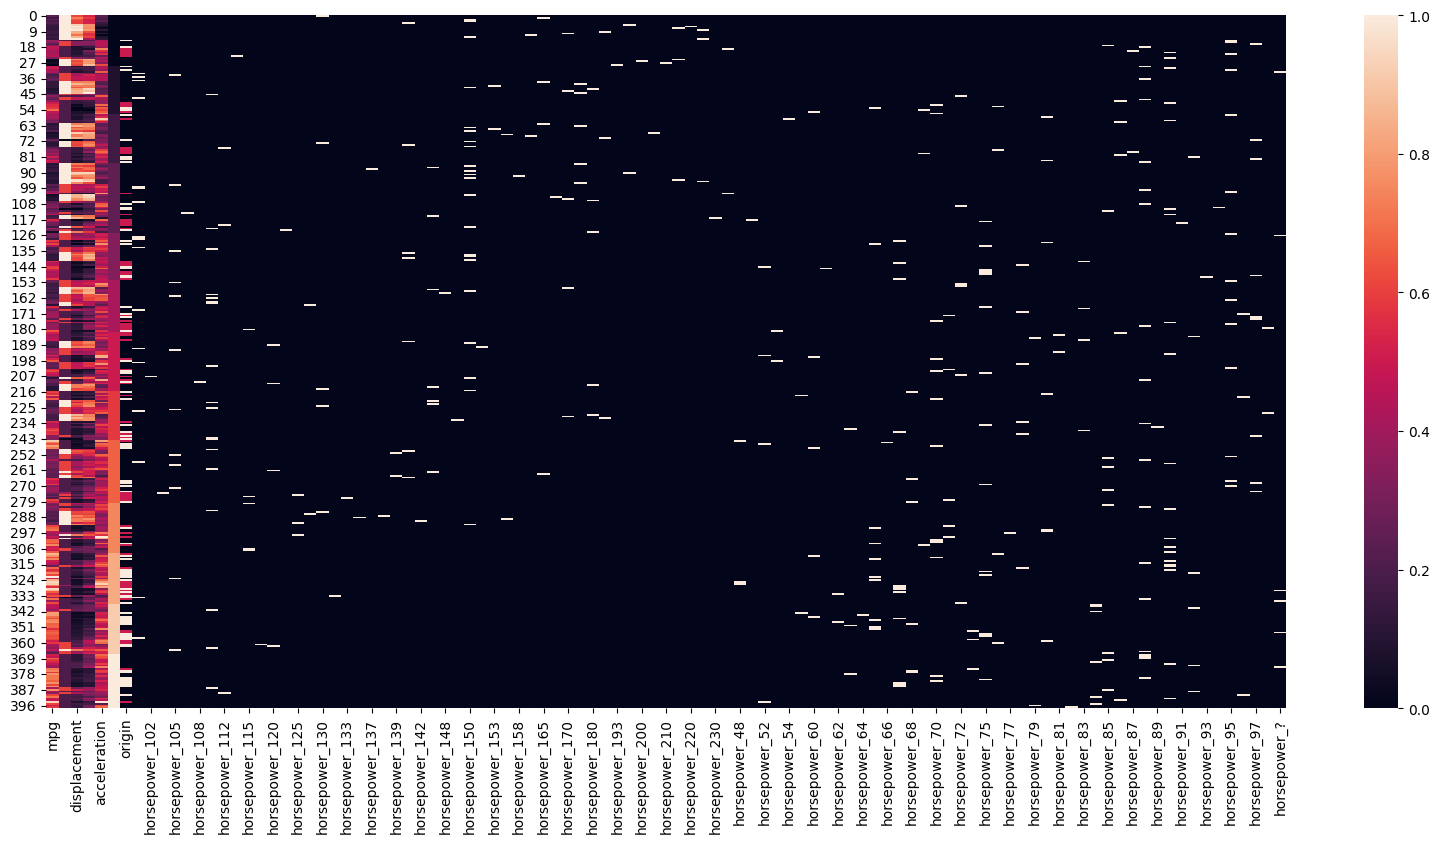

In [37]:
plt.figure(figsize=(20,9))
sns.heatmap(df_scaled)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x900 with 0 Axes>

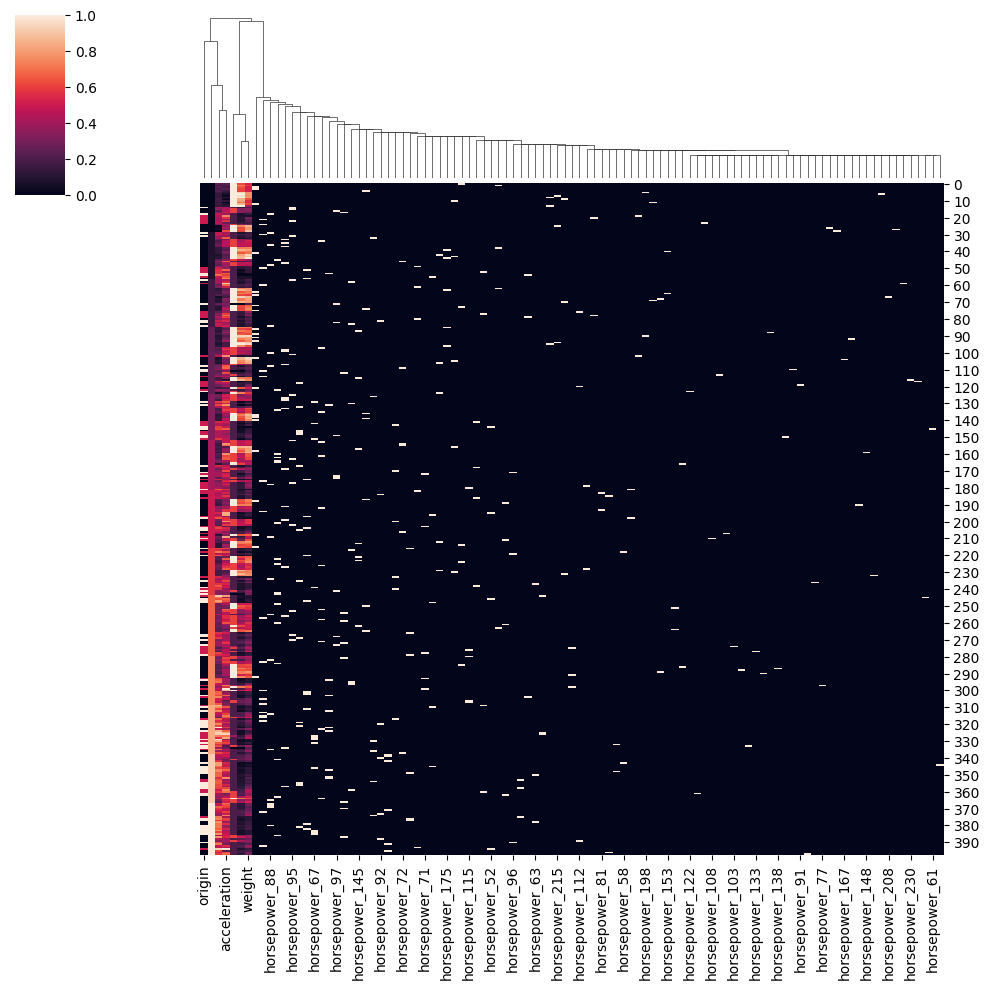

In [38]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled,row_cluster=False)
plt.show()

In [40]:
hier_model = AgglomerativeClustering(n_clusters=5,affinity="euclidean") #distance_threshold is also important.


In [41]:
cluster_labels = hier_model.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
cluster_labels[:20]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

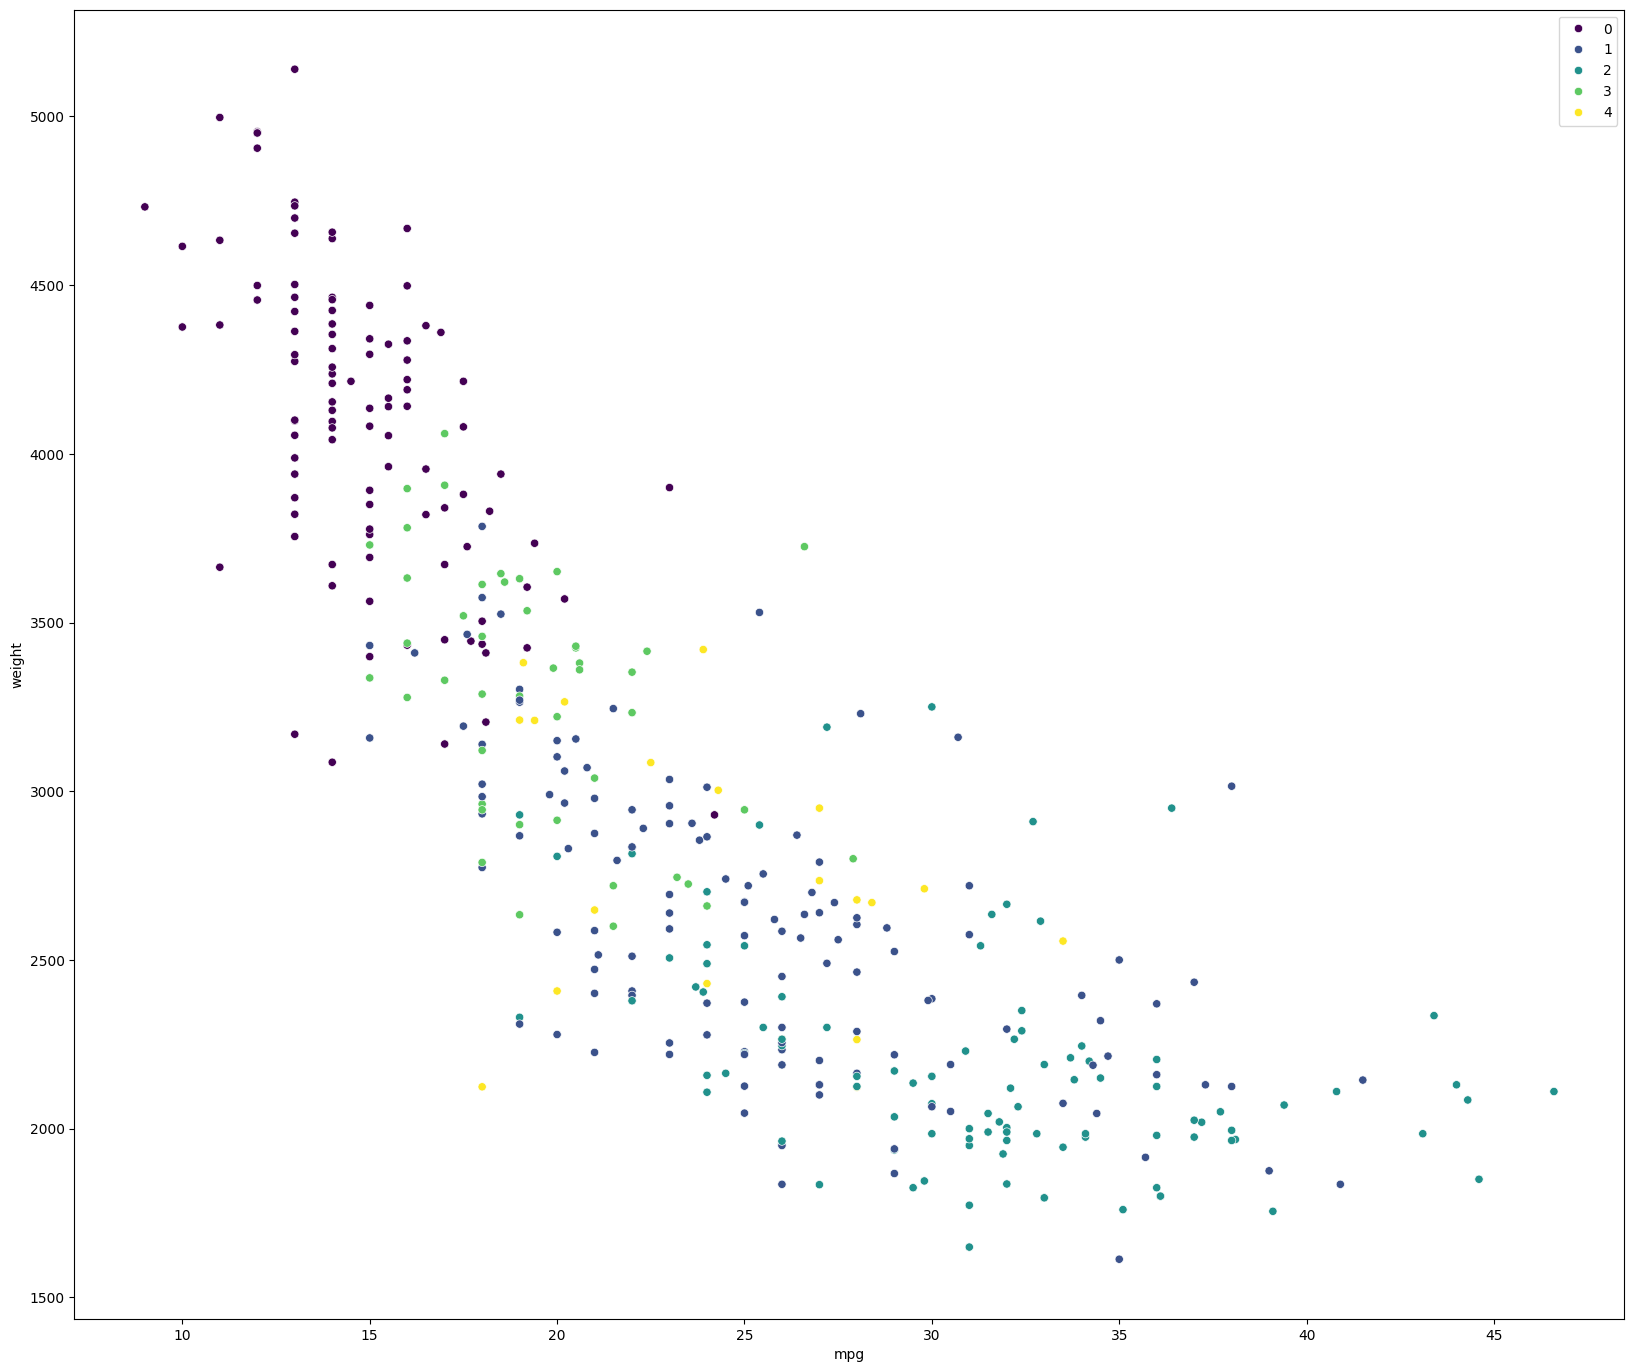

In [42]:
plt.figure(figsize=(20,17))
sns.scatterplot(data=df,x="mpg",y="weight",hue=cluster_labels,palette="viridis")
plt.grid(False)


In [43]:
linkage_matrix = hierarchy.linkage(hier_model.children_)


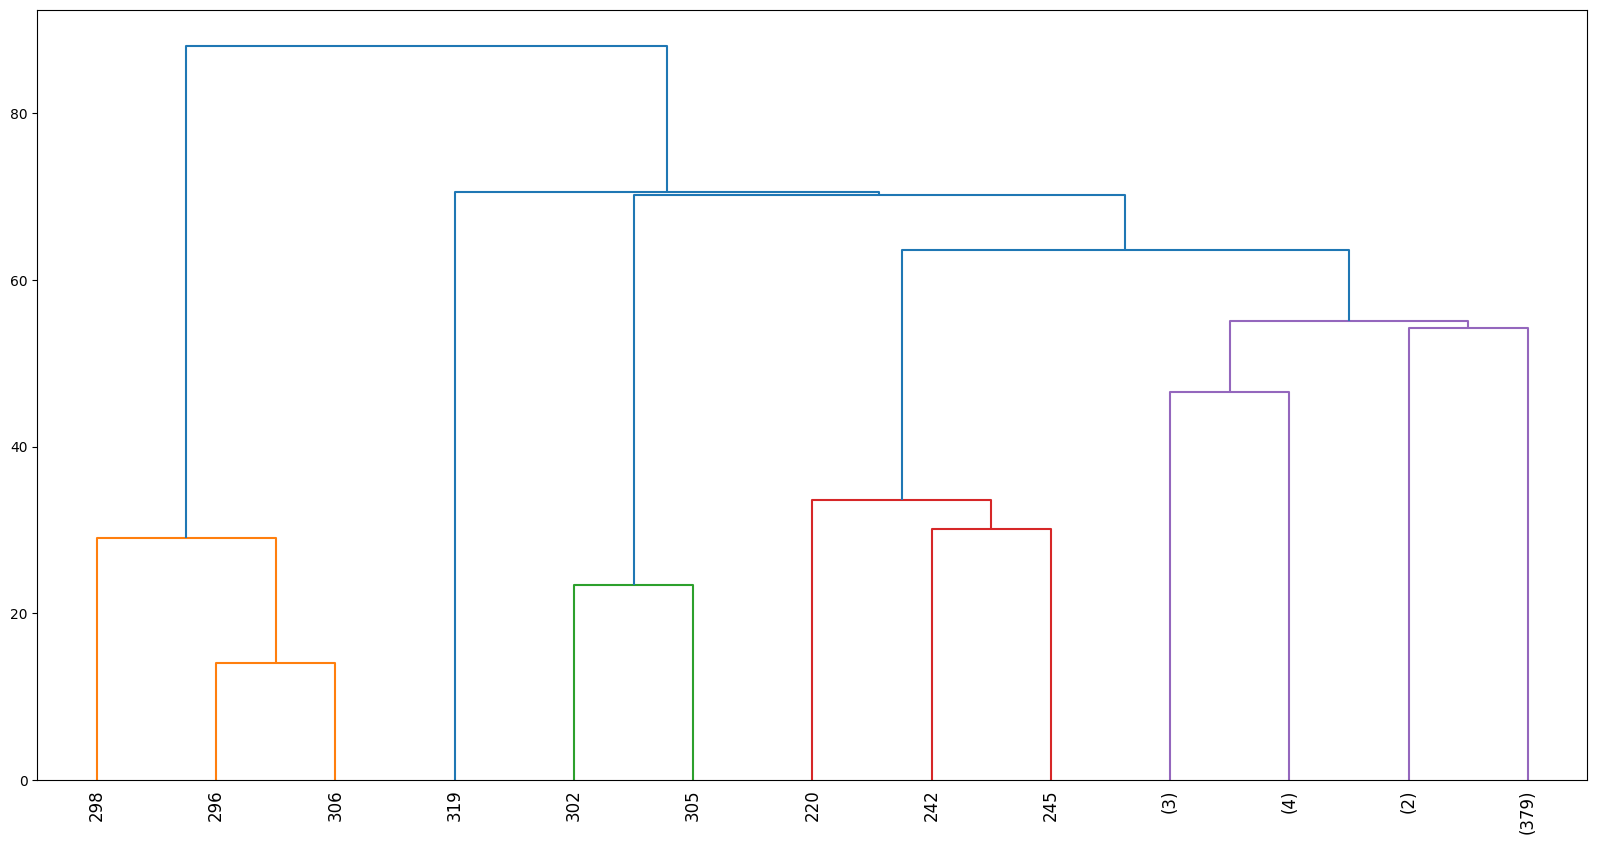

In [44]:
plt.figure(figsize=(20,10))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()